### Lets start off by importing the modules and the data

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from prettytable import PrettyTable
from matplotlib.colors import LogNorm


# Read the data from the excel file
read_file = pd.read_excel('../data/Sales_Data.xlsx')

# Print the number of data entires in the file
print(read_file.shape)

# Print the first 5 rows of the data
print(read_file.head())

(541909, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-01-12 08:26:00       2.55     17850.0  United Kingdom  
1  2010-01-12 08:26:00       3.39     17850.0  United Kingdom  
2  2010-01-12 08:26:00       2.75     17850.0  United Kingdom  
3  2010-01-12 08:26:00       3.39     17850.0  United Kingdom  
4  2010-01-12 08:26:00       3.39     17850.0  United Kingdom  


Lets check the stockcode and corresponding descriptions

In [2]:
# Find the number of unique values in StockCode column
print(read_file['StockCode'].nunique())

# Find the number of unique values in Description column
print(read_file['Description'].nunique())


4070
4223


We can thus make the conclusion that some of the descriptions are not uniform for the same item codes

In [3]:
# Store those values the StockCode values that have more than 1 description in a list
stock_code_list_more_values = read_file.groupby('StockCode')['Description'].nunique()[read_file.groupby('StockCode')['Description'].nunique() > 1].index.tolist()

# Find the length of the list
print(len(stock_code_list_more_values))


650



We can see here that 650 Stockcodes have more than one description. Lets now dive into the decription of a few of these

In [4]:
# Find out the descriptions for some of the StockCode values that have more than 1 description

print(list(read_file[read_file['StockCode'] == stock_code_list_more_values[2]]['Description'].unique()))

print(list(read_file[read_file['StockCode'] == stock_code_list_more_values[78]]['Description'].unique()))

print(list(read_file[read_file['StockCode'] == stock_code_list_more_values[647]]['Description'].unique()))

print(list(read_file[read_file['StockCode'] == stock_code_list_more_values[649]]['Description'].unique()))



['SMALL FOLDING SCISSOR(POINTED EDGE)', 'check']
['ELEPHANT, BIRTHDAY CARD, ', 'ELEPHANT BIRTHDAY CARD ']
['BOXED GLASS ASHTRAY', 'ebay']
['Dotcomgiftshop Gift Voucher £20.00', 'to push order througha s stock was ']


As we can see most of them are data entry errors and hence we can clean and make them uniform.

In [5]:

# Find out the most common description for each of the items in stock_code_list_more_values, and store in a dictionary
stock_code_dict = {}
for i in stock_code_list_more_values:
    stock_code_dict[i] = read_file[read_file['StockCode'] == i]['Description'].value_counts().index[0]

# Now update the desciption column with the most common description for each StockCode
for i in stock_code_list_more_values:
    read_file.loc[read_file['StockCode'] == i, 'Description'] = stock_code_dict[i]


# Print the number of StockCode values that have more than 1 description in a list
print(len(read_file.groupby('StockCode')['Description'].nunique()[read_file.groupby('StockCode')['Description'].nunique() > 1].index.tolist()))


0


Now that we have cleaned this up, we can start analysing the data. We will start with a little demographic analysis

In [6]:
# Lets find out the general demographics of the customers
country_list = read_file['Country'].unique().tolist()
country_list.sort()
print(country_list)

# Find out the number of customers 
number_of_customers = read_file['CustomerID'].nunique()
print(number_of_customers)

# Find out the number of customers from each country and store in a dictionary
country_customer_dict = {}
for i in country_list:
    country_customer_dict[i] = read_file[read_file['Country'] == i]['CustomerID'].nunique()


# Sort the dictionary by the number of customers
country_customer_dict = {k: v for k, v in sorted(country_customer_dict.items(), key=lambda item: item[1], reverse = True)}
print(country_customer_dict)


# Plot the numbers on a world map using linear color scale
fig = px.choropleth(locations=list(country_customer_dict.keys()), locationmode="country names", color=list(country_customer_dict.values()), hover_name=list(country_customer_dict.keys()), color_continuous_scale=px.colors.sequential.Plasma, title='Number of Customers from each country')
# Change the hover txt to show the customers and number of customer
fig.update_traces(hovertemplate='Country: %{hovertext}<br>Number of Customers: %{z}')
# Show the figure
fig.show()
# Save the figure as png
fig.write_image('../out/Number of Customers from each country.png')

['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE', 'European Community', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified']
4372
{'United Kingdom': 3950, 'Germany': 95, 'France': 87, 'Spain': 31, 'Belgium': 25, 'Switzerland': 21, 'Portugal': 19, 'Italy': 15, 'Finland': 12, 'Austria': 11, 'Norway': 10, 'Australia': 9, 'Channel Islands': 9, 'Denmark': 9, 'Netherlands': 9, 'Cyprus': 8, 'Japan': 8, 'Sweden': 8, 'Poland': 6, 'Canada': 4, 'Greece': 4, 'Israel': 4, 'USA': 4, 'Unspecified': 4, 'EIRE': 3, 'Bahrain': 2, 'Malta': 2, 'United Arab Emirates': 2, 'Brazil': 1, 'Czech Republic': 1, 'European Community': 1, 'Iceland': 1, 'Lebanon': 1, 'Lithuania': 1, 'RS

As we can see the number of customers in UK are significantly high when compared to other countries.

We can see that Hong Kong has zero customers, yet it is in the list, this could mean that the CustomerID is non-existent for the invoices made to customers in Hong Kong. Hence, there are some missing customer IDs. 

We can either remove these data points, or make an strong assumption that each invoice ID is mapped to a unique customer. We should also keep in mind that this could happen for other countries as well. 

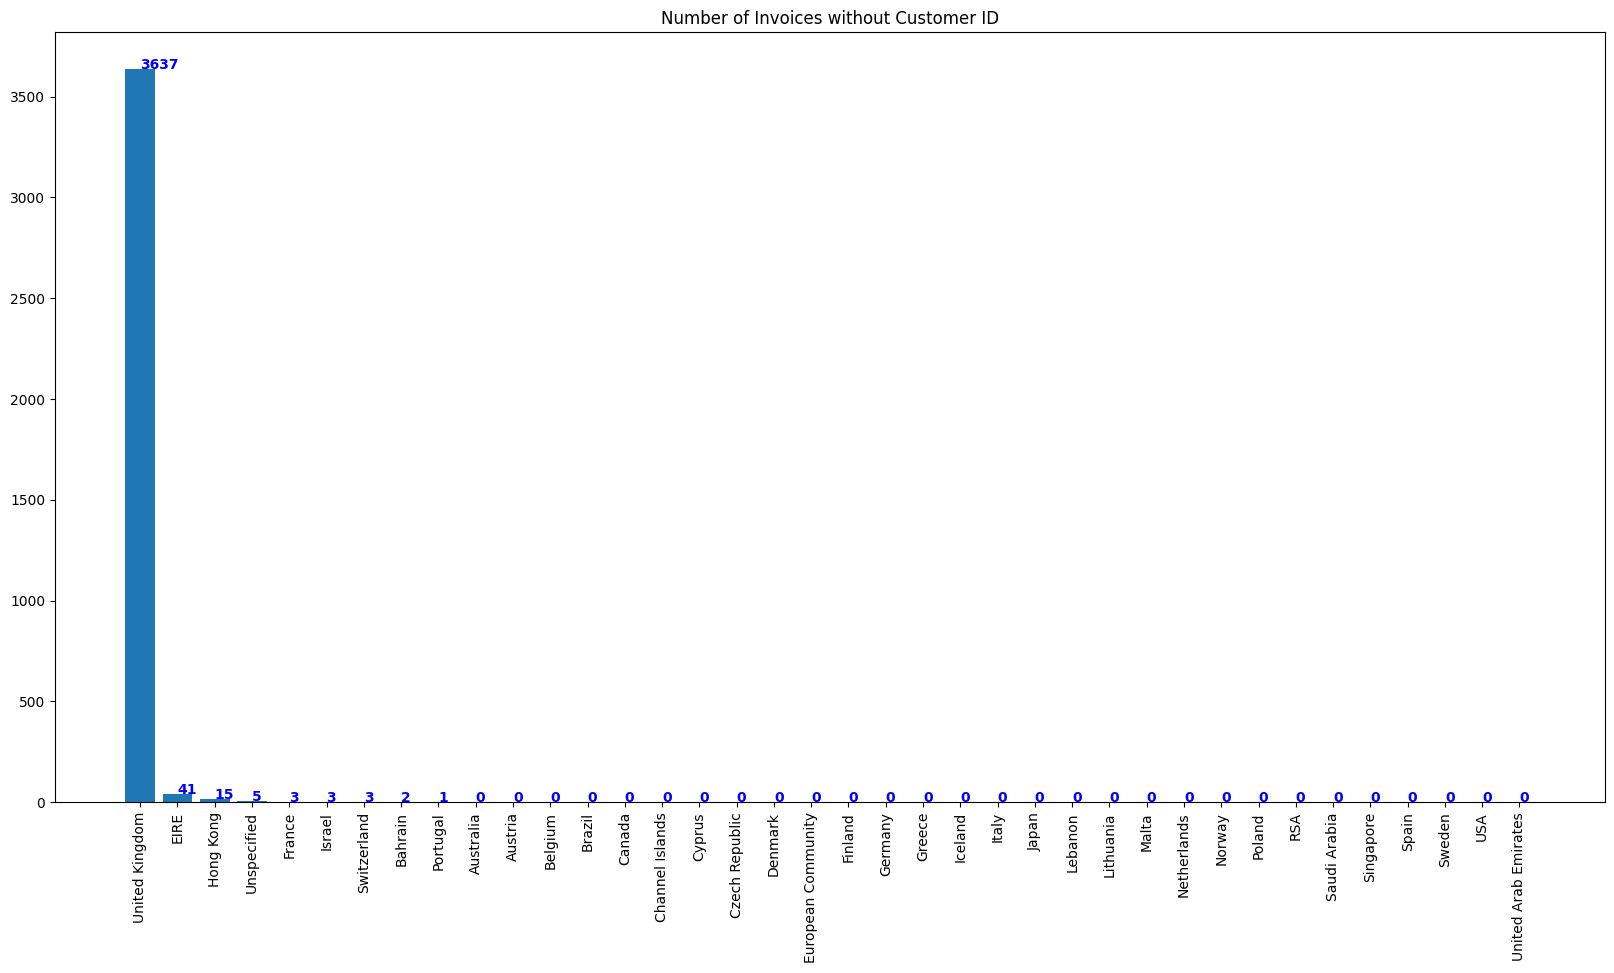

In [7]:
# For each country find out the number of unique invoices that do not have a customerID and store in a dictionary
country_non_customer_invoice_dict = {}

# Find out the number of invoices that do not have a customerID from each country
for i in country_list:
    country_non_customer_invoice_dict[i] = read_file[(read_file['Country'] == i) & (read_file['CustomerID'].isnull())]['InvoiceNo'].nunique()

country_non_customer_invoice_dict = {k: v for k, v in sorted(country_non_customer_invoice_dict.items(), key=lambda item: item[1], reverse = True)}


# Draw a bar chart to show the number of non customers invoices from each country, with the number on top of each bar
plt.figure(figsize=(20,10))
plt.title('Number of Invoices without Customer ID')
plt.bar(country_non_customer_invoice_dict.keys(), country_non_customer_invoice_dict.values())
for i, v in enumerate(country_non_customer_invoice_dict.values()):
    plt.text(i, v, str(v), color='blue', fontweight='bold')
plt.xticks(rotation=90)
# store the bar chart in a variable
fig = plt.gcf()
# save the bar chart as a png file
fig.savefig('../out/Number of Invoices without Customer ID.png')
plt.show()



After Analysing we can find out that the number of invoices without a customer ID is quite high for countries like UK, while it is significantly lower for other countries. At this stage we could also consider the percentage of invoices without a customer ID

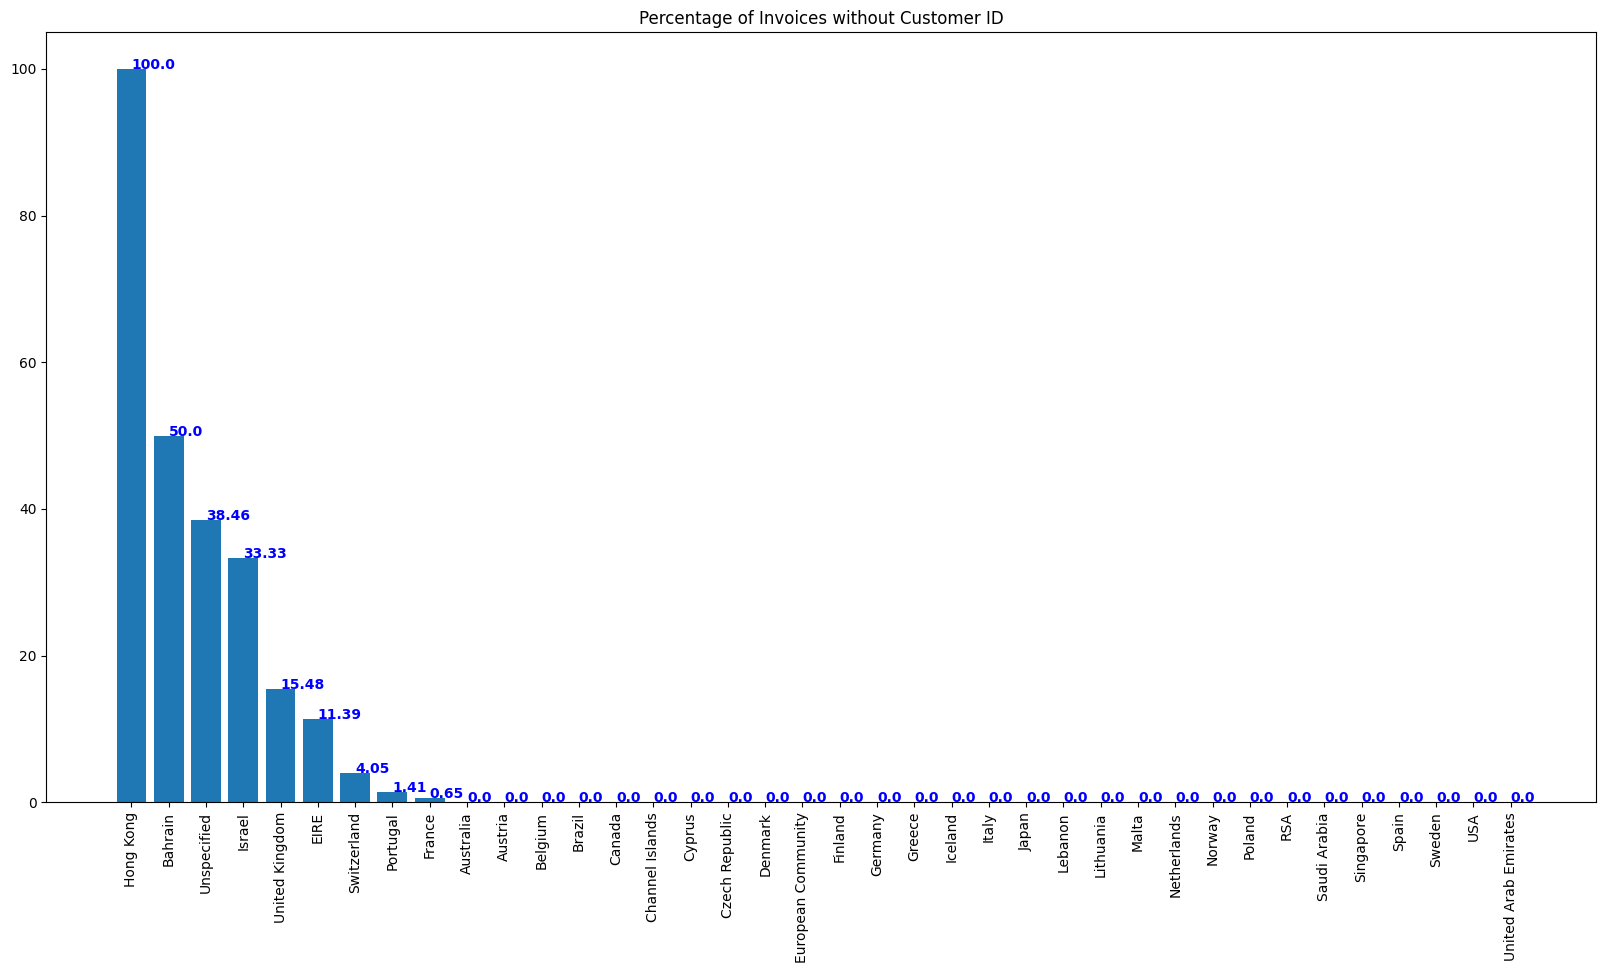

In [8]:
# Find number of invoices from each country
country_invoice_dict = {}
for i in country_list:
    country_invoice_dict[i] = read_file[read_file['Country'] == i]['InvoiceNo'].nunique()


# Find the percentage of invoices that do not have a customerID from each country
country_non_customer_invoice_percent_dict = {}
for i in country_list:
    country_non_customer_invoice_percent_dict[i] = round((country_non_customer_invoice_dict[i]/country_invoice_dict[i])*100, 2)
    
 # Sort the dictionary by the percentage of invoices that do not have a customerID
country_non_customer_invoice_percent_dict = {k: v for k, v in sorted(country_non_customer_invoice_percent_dict.items(), key=lambda item: item[1], reverse = True)}


# Draw a bar chart to show the percentage of non customers invoices from each country, with the number on top of each bar
plt.figure(figsize=(20,10))
plt.title('Percentage of Invoices without Customer ID')
plt.bar(country_non_customer_invoice_percent_dict.keys(), country_non_customer_invoice_percent_dict.values())
for i, v in enumerate(country_non_customer_invoice_percent_dict.values()):
    plt.text(i, v, str(v), color='blue', fontweight='bold')
plt.xticks(rotation=90)
# store the bar chart in a variable
fig = plt.gcf()
# save the bar chart as a png file
fig.savefig('../out/Percentage of Invoices without Customer ID.png')
plt.show()


After Analysing the percentage, we can see that for countries like Hong Kong, Bahrain, Unspecified and Israel, the number is quite significant, and hence we will need to think about different ways in which we could deal with it so that our data analysis is accurate.

We can hence keep the data as such and treat each invoice as individual customers, but this would be a problem as we might overestimate our number of customers. Another solution would be to separate the data into 2 segments: Invoices with Customer ID, and those without. Now we can analyse the invoices with CustomerID to find the percentage of that belongs to one time customers, and use this as a baseline for invoices with no customerID, but there are quite a few issues with this method:
1. We do not know if any customers with customer Id might have purchased, but were also associated with invoices without customer ID
2. We do not know if we can replicate the distribution into non-customerID invoices, as their shopping culture would be different. For example when people buy goods from Hong Kong, the invoces most probably did not have a customer ID attched to it as they were single time purchasers, or it also happen that since the number of invoices associated with hong Kong is just 15, that all these purchases were made just by the same entity.
3. There is also a cultural factor that we would need to take into account, as consumers from different countries would be accustomed to different shopping cultures.

The Best way to move forward would be to address the problem inidvidually for each country.

1. Hong Kong (100%, 15 such invoices) - As the percentage is high, but the number is low, we can consider them in our dataset, as individual entities
2. Bahrain (50%, 2 such invoices) - As the percentage is high, but the number is low, we can consider them in our dataset, as individual entities
3. Unspecified (38.46%, 5 such invoices) - As the percentage is high, but the number is low, we can consider them in our dataset, as individual entities
4. Israel (33.33%, 3 such invoices) - As the percentage is high, but the number is low, we can consider them in our dataset, as individual entities
5. United Kingdom (15.48%) - As the percentage of the Data labelled non-customers is less, we can exclude them from the data, when doing customer segmentation and demographic analysis
6. EIRE (11.39%) - As the percentage of the Data labelled non-customers is less, we can exclude them from the data, when doing customer segmentation and demographic analysis
7. Swtizerland (4.05%) - As the percentage of the Data labelled non-customers is less, we can exclude them from the data, when doing customer segmentation and demographic analysis
8. Portugal (1.41%) - As the percentage of the Data labelled non-customers is less, we can exclude them from the data, when doing customer segmentation and demographic analysis
9. France (0.65%) - As the percentage of the Data labelled non-customers is less, we can exclude them from the data, when doing customer segmentation and demographic analysis

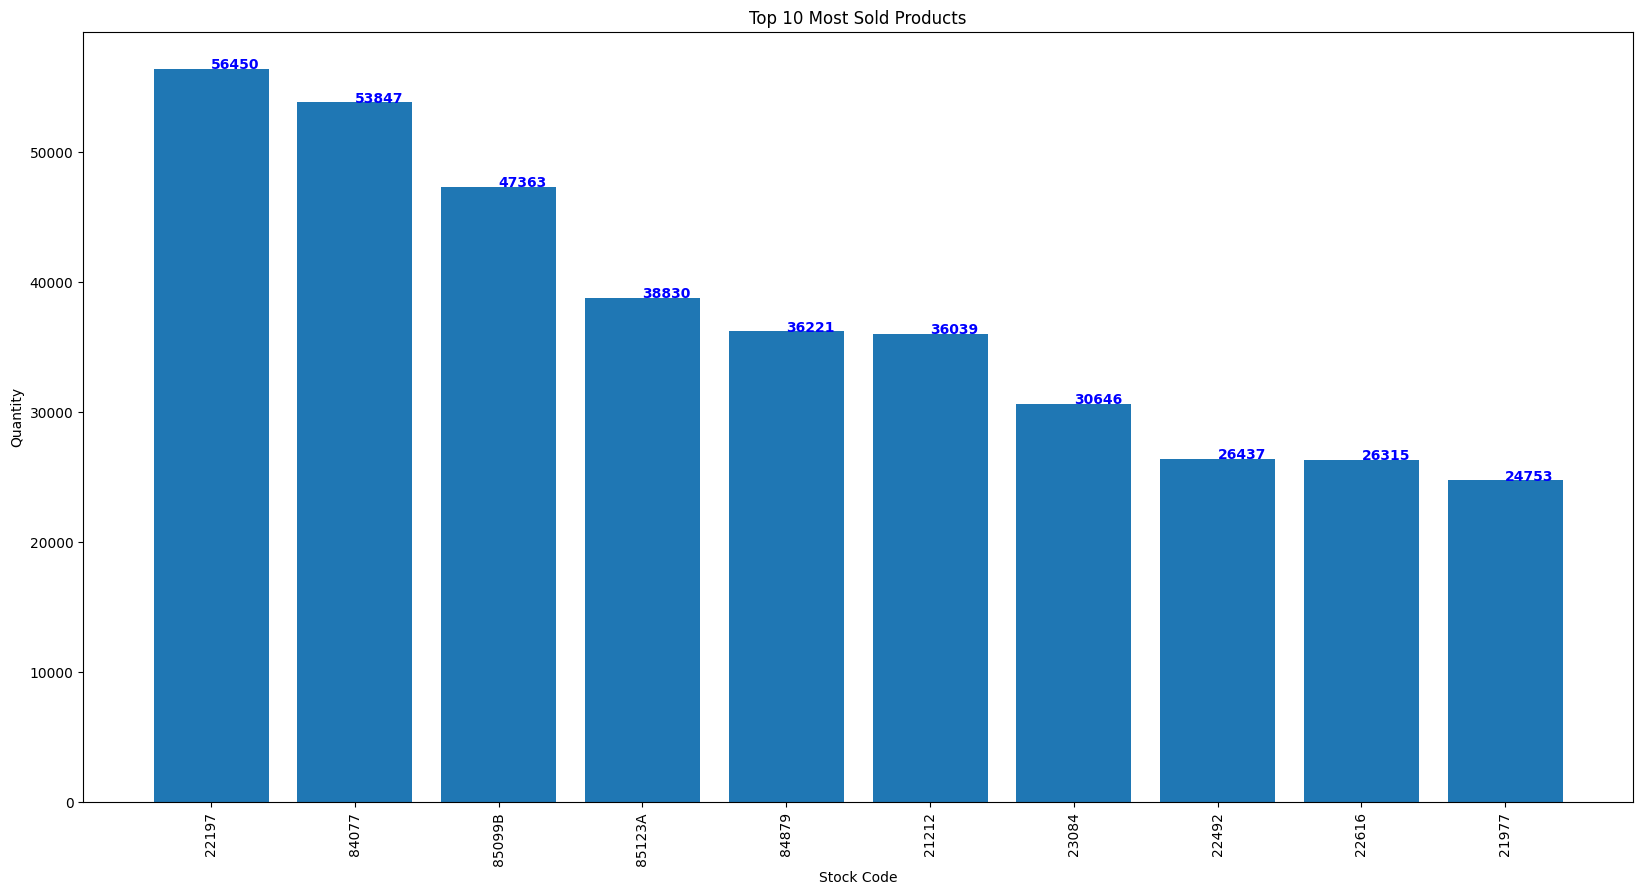

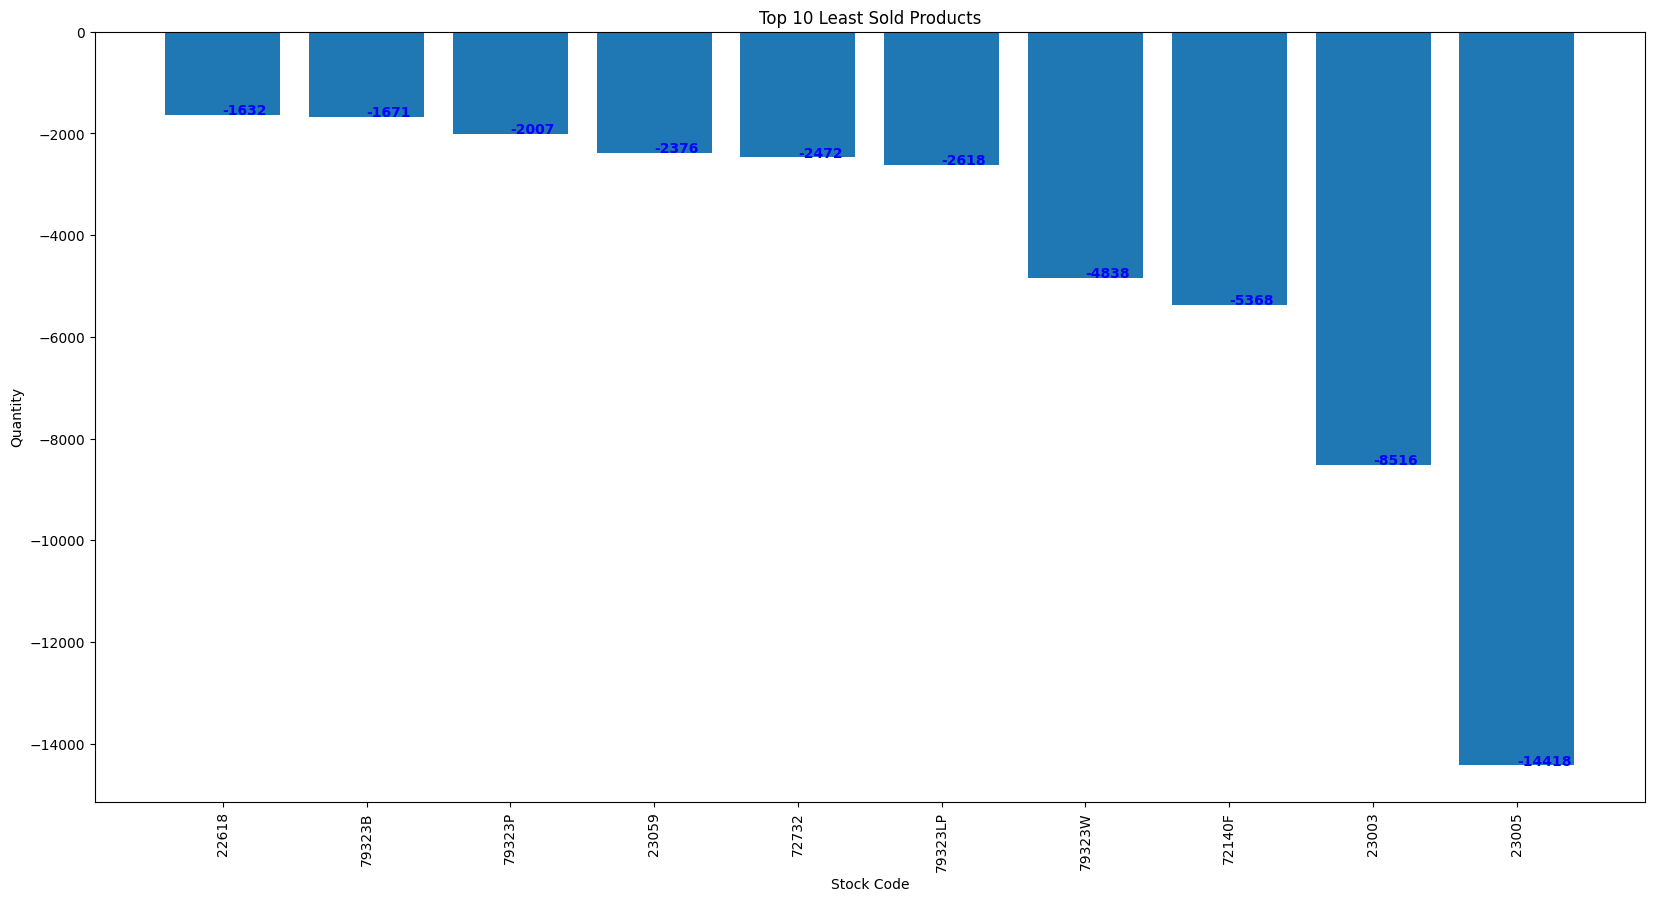

In [9]:
# Lets Analyse our product Sales

# Find out the number of unique products
number_of_products = read_file['StockCode'].nunique()

# Product List
stock_code_list = read_file['StockCode'].unique()

# Find out the product that was sold the most in terms of quantity
most_sold_products = {}
for i in stock_code_list:
    most_sold_products[i] = read_file[read_file['StockCode'] == i]['Quantity'].sum() 

most_sold_products = {k: v for k, v in sorted(most_sold_products.items(), key=lambda item: item[1], reverse = True)}
# Top 10 Most sold product
top_sold_10_products = list(most_sold_products.keys())[:10]
# convert each to string
top_sold_10_products = [str(i) for i in top_sold_10_products]

# Top 10 Least sold product
least_sold_10_products = list(most_sold_products.keys())[-10:]
# convert each to string
least_sold_10_products = [str(i) for i in least_sold_10_products]

# Graph the top 10 most sold products
plt.figure(figsize=(20,10))
plt.title('Top 10 Most Sold Products')
plt.bar(top_sold_10_products, list(most_sold_products.values())[:10])
for i, v in enumerate(list(most_sold_products.values())[:10]):
    plt.text(i, v, str(v), color='blue', fontweight='bold')
plt.xlabel('Stock Code')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
fig = plt.gcf()
fig.savefig('../out/Top 10 Most Sold Products.png')
plt.show()


# graph the top 10 least sold products
plt.figure(figsize=(20,10))
plt.title('Top 10 Least Sold Products')
plt.bar(least_sold_10_products, list(most_sold_products.values())[-10:])
for i, v in enumerate(list(most_sold_products.values())[-10:]):
    plt.text(i, v, str(v), color='blue', fontweight='bold')
plt.xlabel('Stock Code')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
fig = plt.gcf()
fig.savefig('../out/Top 10 Least Sold Products.png')
plt.show()


We will now find out the products that were most and least sold in each country, and save the data as a csv file.

In [10]:

# Find out the product that was sold the most and least in terms of quantity in different countries
most_sold_products_by_country = {}
least_sold_products_by_country = {}

read_file["Quantity"] = read_file["Quantity"].astype(int)
read_file['UnitPrice'] = read_file['UnitPrice'].astype(int)


# Drop rows with missing country or stock code
grouped = read_file.dropna(subset=["Country", "StockCode"])
# Group the data by country and stock code and sum the quantity sold
grouped = grouped.groupby(["Country", "StockCode"])["Quantity"].sum().reset_index()


# Find the index of the row with the highest and lowest quantity sold for each country
most_sold_index = grouped.groupby("Country")["Quantity"].idxmax()
least_sold_index = grouped.groupby("Country")["Quantity"].idxmin()


# Extract the corresponding stock codes for each country
most_sold_products_by_country = grouped.loc[most_sold_index][["Country", "StockCode"]].set_index("Country")["StockCode"].to_dict()
least_sold_products_by_country = grouped.loc[least_sold_index][["Country", "StockCode"]].set_index("Country")["StockCode"].to_dict()


# Extract the corresponding quantity sold for each country
most_sold_products_by_country_quantity = grouped.loc[most_sold_index][["Country", "Quantity"]].set_index("Country")["Quantity"].to_dict()
least_sold_products_by_country_quantity = grouped.loc[least_sold_index][["Country", "Quantity"]].set_index("Country")["Quantity"].to_dict()


# create a table for the most sold products by country, and save it as a csv file
most_sold_products_by_country_df = pd.DataFrame.from_dict(most_sold_products_by_country, orient='index', columns=['Stock Code'])
most_sold_products_by_country_df.index.name = 'Country'
most_sold_products_by_country_df = most_sold_products_by_country_df.reset_index()
most_sold_products_by_country_df['Stock Code'] = most_sold_products_by_country_df['Stock Code'].astype(str)
most_sold_products_by_country_df['Quantity'] = most_sold_products_by_country_df['Country'].map(most_sold_products_by_country_quantity)
most_sold_products_by_country_df.to_csv('../out/Most Sold Products by Country.csv', index=False)


# create a table for the least sold products by country, and save it as a csv file
least_sold_products_by_country_df = pd.DataFrame.from_dict(least_sold_products_by_country, orient='index', columns=['Stock Code'])
least_sold_products_by_country_df.index.name = 'Country'
least_sold_products_by_country_df = least_sold_products_by_country_df.reset_index()
least_sold_products_by_country_df['Stock Code'] = least_sold_products_by_country_df['Stock Code'].astype(str)
least_sold_products_by_country_df['Quantity'] = least_sold_products_by_country_df['Country'].map(least_sold_products_by_country_quantity)
least_sold_products_by_country_df.to_csv('../out/Least Sold Products by Country.csv', index=False)


# combine the 2 table so that we can view the most and least sold products in the same table
most_least_sold_products_by_country_df = pd.merge(most_sold_products_by_country_df, least_sold_products_by_country_df, on='Country', how='outer')
most_least_sold_products_by_country_df.columns = ['Country', 'Most Sold Product', 'Quantity Sold', 'Least Sold Product', 'Quantity Sold']
most_least_sold_products_by_country_df.to_csv('../out/Most and Least Sold Products by Country.csv', index=False)




Invoice Anaylsis

1. Find out the average value of each invoice

In [11]:
# Find out the total value of each  unique invoice
read_file['Total Quantity Value'] = read_file['Quantity'] * read_file['UnitPrice']
read_file['Total Quantity Value'] = read_file['Total Quantity Value'].fillna(0)

read_file['InvoiceNo'] = read_file['InvoiceNo'].astype(str)

# Find out the total value of each invoice
total_invoice_value = {}

# Find out the total value of each invoice
for i in read_file['InvoiceNo'].unique():
    total_invoice_value[i] = read_file[read_file['InvoiceNo'] == i]['Total Quantity Value'].sum()

# Find out Average value of each invoice
average_invoice_value = round(sum(total_invoice_value.values())/len(total_invoice_value), 2)
print('Average Invoice Value: ', average_invoice_value)

# save as csv with two columns Invoice No and Total Invoice Value
total_invoice_value_df = pd.DataFrame.from_dict(total_invoice_value, orient='index', columns=['Total Invoice Value'])
total_invoice_value_df.index.name = 'Invoice No'
total_invoice_value_df = total_invoice_value_df.reset_index()
total_invoice_value_df.to_csv('../out/Each Invoice Value.csv', index=False)


Average Invoice Value:  272.55


Invoice Analysis

1. Find out the average value of invoice in different countries

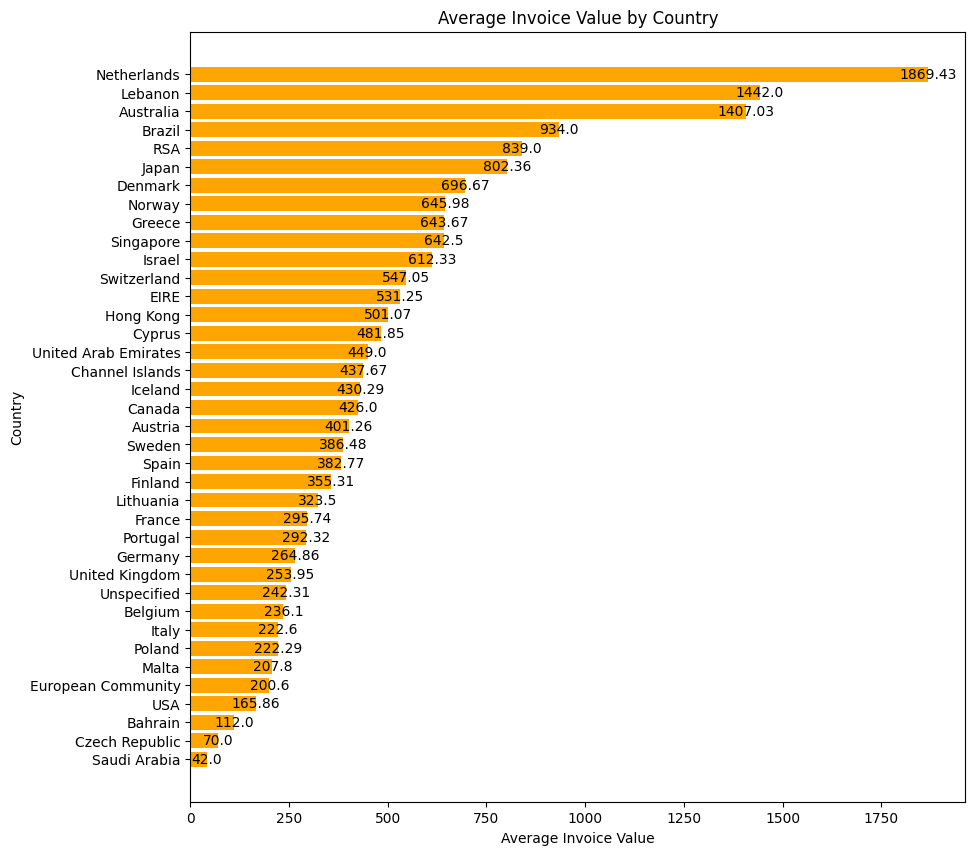

In [12]:
# Find out the average value of each invoice in different countries
average_invoice_value_by_country = {}
for i in read_file['Country'].unique():
    # round off the average value to 2 decimal places
    average_invoice_value_by_country[i] = round(read_file[read_file['Country'] == i]['Total Quantity Value'].sum()/read_file[read_file['Country'] == i]['InvoiceNo'].nunique(), 2)

   
# Sort them in ascending order
average_invoice_value_by_country = dict(sorted(average_invoice_value_by_country.items(), key=lambda item: item[1], reverse=False))

# Plot a horizontal bar chart to show the average value of each invoice in different countries
plt.figure(figsize=(10, 10))
plt.barh(list(average_invoice_value_by_country.keys()), list(average_invoice_value_by_country.values()), color='orange')
plt.title('Average Invoice Value by Country')
plt.xlabel('Average Invoice Value')
plt.ylabel('Country')
for index, value in enumerate(list(average_invoice_value_by_country.values())):
    plt.text(value, index, str(value), ha='center', va='center')
plt.savefig('../out/Average Invoice Value by Country.png')
plt.show()


Invoice Analysis

1. Find out about the ratio of cancelled orders

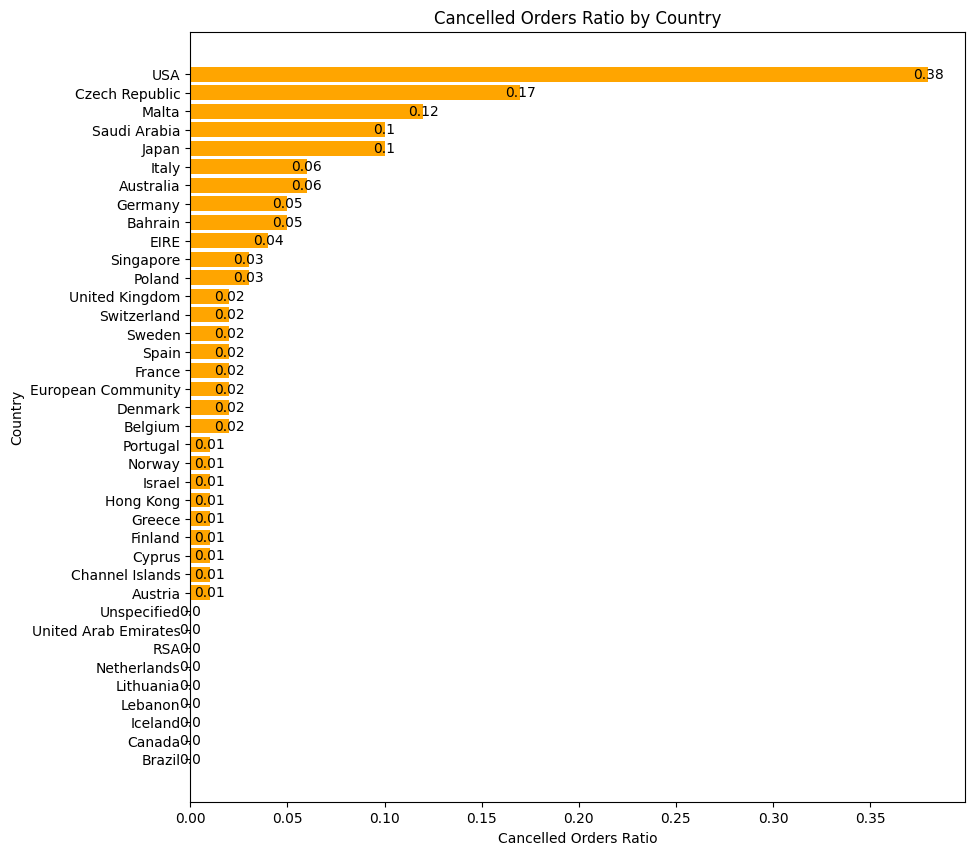

In [13]:
# Find out the ratio of orders that are cancelled
cancelled_orders = read_file[read_file['InvoiceNo'].str.contains('C')]
cancelled_orders_ratio = round(len(cancelled_orders)/len(read_file), 2)

# Find out the ratio of orders that are cancelled in different countries
cancelled_orders_by_country = {}
for i in country_list:
    cancelled_orders_by_country[i] = round(len(read_file[(read_file['Country'] == i) & (read_file['InvoiceNo'].str.contains('C'))])/len(read_file[read_file['Country'] == i]), 2)

# Sort them in ascending order
cancelled_orders_by_country = dict(sorted(cancelled_orders_by_country.items(), key=lambda item: item[1], reverse=False))

# Plot a horizontal bar chart to show the ratio of orders that are cancelled in different countries
plt.figure(figsize=(10, 10))
plt.barh(list(cancelled_orders_by_country.keys()), list(cancelled_orders_by_country.values()), color='orange')
plt.title('Cancelled Orders Ratio by Country')
plt.xlabel('Cancelled Orders Ratio')
plt.ylabel('Country')
for index, value in enumerate(list(cancelled_orders_by_country.values())):
    plt.text(value, index, str(value), ha='center', va='center')
plt.savefig('../out/Cancelled Orders Ratio by Country.png')
plt.show()


Invoice Analysis

1. Analyse Sales by each month

In [14]:

# Find out the which month has the highest sales

read_file['InvoiceDate'] = pd.to_datetime(read_file['InvoiceDate'])
read_file['Month'] = read_file['InvoiceDate'].dt.month
read_file['Year'] = read_file['InvoiceDate'].dt.year
read_file['Month-Year'] = read_file['Month'].astype(str) + '-' + read_file['Year'].astype(str)


# Find out the total value of invoice in different months over the 2 years
total_invoice_value_by_month = {}
for i in read_file['Month-Year'].unique():
    total_invoice_value_by_month[i] = read_file[read_file['Month-Year'] == i]['Total Quantity Value'].sum()


# Find out the which month has the highest sales over the 2 years
highest_sales_month = max(total_invoice_value_by_month, key=total_invoice_value_by_month.get)
# Find out the which month has the lowest sales over the 2 years
lowest_sales_month = min(total_invoice_value_by_month, key=total_invoice_value_by_month.get)

# Find out which month had the highest sales in 2010
highest_sales_month_2010 = max({k: v for k, v in total_invoice_value_by_month.items() if k.split('-')[1] == '2010'}, key=total_invoice_value_by_month.get)
# Find out which month had the lowest sales in 2010
lowest_sales_month_2010 = min({k: v for k, v in total_invoice_value_by_month.items() if k.split('-')[1] == '2010'}, key=total_invoice_value_by_month.get)

# Find out which month had the highest sales in 2011
highest_sales_month_2011 = max({k: v for k, v in total_invoice_value_by_month.items() if k.split('-')[1] == '2011'}, key=total_invoice_value_by_month.get)
# Find out which month had the lowest sales in 2011
lowest_sales_month_2011 = min({k: v for k, v in total_invoice_value_by_month.items() if k.split('-')[1] == '2011'}, key=total_invoice_value_by_month.get)


# Tablulate these findings in a table
table = PrettyTable()
table.field_names = ['Highest Sales Month', 'Lowest Sales Month', 'Highest Sales Month in 2010', 'Lowest Sales Month in 2010', 'Highest Sales Month in 2011', 'Lowest Sales Month in 2011']
table.add_row([highest_sales_month, lowest_sales_month, highest_sales_month_2010, lowest_sales_month_2010, highest_sales_month_2011, lowest_sales_month_2011])
print(table)

# convert pretty table into csv
with open('../out/Highest and Lowest Sales Month.csv', 'w') as f:
    f.write(table.get_string())



+---------------------+--------------------+-----------------------------+----------------------------+-----------------------------+----------------------------+
| Highest Sales Month | Lowest Sales Month | Highest Sales Month in 2010 | Lowest Sales Month in 2010 | Highest Sales Month in 2011 | Lowest Sales Month in 2011 |
+---------------------+--------------------+-----------------------------+----------------------------+-----------------------------+----------------------------+
|       11-2011       |       5-2010       |           12-2010           |           5-2010           |           11-2011           |          12-2011           |
+---------------------+--------------------+-----------------------------+----------------------------+-----------------------------+----------------------------+


Invoice Analysis

Find out:
1. Total Value of Invoice in Different Months in Different Countries
2. The Month with the Highest Sales in Different Countries
3. The Month with the Lowest Sales in Different Countries
4. The Country with the Highest Sales in Different Months
5. The Country with the Lowest Sales in Different Months


In [15]:

# Find out the total value of invoice in different months in different countries
total_invoice_value_by_month_by_country = {}
for i in country_list:
    temp_dict = {}
    for j in read_file['Month-Year'].unique():
        temp_dict[j] = read_file[(read_file['Country'] == i) & (read_file['Month-Year'] == j)]['Total Quantity Value'].sum()
    total_invoice_value_by_month_by_country[i] = temp_dict


# Find out the which month has the highest sales in different countries along with the value
highest_sales_month_by_country = {}
for i in country_list:
    highest_sales_month_by_country[i] = max(total_invoice_value_by_month_by_country[i], key=total_invoice_value_by_month_by_country[i].get)
    

# Find out the which month has the lowest sales in different countries
lowest_sales_month_by_country = {}
for i in country_list:
    lowest_sales_month_by_country[i] = min(total_invoice_value_by_month_by_country[i], key=total_invoice_value_by_month_by_country[i].get)


# Tabulate the highest sales month for each country
highest_sales_month_by_country_df = pd.DataFrame.from_dict(highest_sales_month_by_country, orient = 'index', columns=['Highest Sales Month'])
highest_sales_month_by_country_df.index.name = 'Country'
highest_sales_month_by_country_df = highest_sales_month_by_country_df.reset_index()
highest_sales_month_by_country_df['Highest Sales Month'] = highest_sales_month_by_country_df['Highest Sales Month'].astype(str)
highest_sales_month_by_country_df.to_csv('../out/Highest Sales Month by Country.csv', index=False)


# Tabulate the Lowest sales month for each country
lowest_sales_month_by_country_df = pd.DataFrame.from_dict(lowest_sales_month_by_country, orient = 'index', columns=['Lowest Sales Month'])
lowest_sales_month_by_country_df.index.name = 'Country'
lowest_sales_month_by_country_df = lowest_sales_month_by_country_df.reset_index()
lowest_sales_month_by_country_df['Lowest Sales Month'] = lowest_sales_month_by_country_df['Lowest Sales Month'].astype(str)
lowest_sales_month_by_country_df.to_csv('../out/Lowest Sales Month by Country.csv', index=False)

# Combine the two tables
highest_lowest_month_by_country_df = pd.merge(highest_sales_month_by_country_df, lowest_sales_month_by_country_df, on='Country', how='outer')
highest_lowest_month_by_country_df.columns = ['Country', 'Highest Sales Month', 'Lowest Sales Month']
highest_lowest_month_by_country_df.to_csv('../out/Highest and Lowest Sales Month by Country.csv', index=False)



# Find out which country has the highest sales in each month
highest_sales_country_by_month = {}
for i in read_file['Month-Year'].unique():
    temp_dict = {}
    for j in country_list:
        temp_dict[j] = read_file[(read_file['Country'] == j) & (read_file['Month-Year'] == i)]['Total Quantity Value'].sum()
    highest_sales_country_by_month[i] = max(temp_dict, key=temp_dict.get)


# Find out which country has the lowest sales in each month
lowest_sales_country_by_month = {}
for i in read_file['Month-Year'].unique():
    temp_dict = {}
    for j in country_list:
        temp_dict[j] = read_file[(read_file['Country'] == j) & (read_file['Month-Year'] == i)]['Total Quantity Value'].sum()
    lowest_sales_country_by_month[i] = min(temp_dict, key=temp_dict.get)


# Tabulate the Highest sales Country for each Month
highest_sales_country_by_month_df = pd.DataFrame.from_dict(highest_sales_country_by_month, orient='index', columns=['Highest Sales Country'])
highest_sales_country_by_month_df.index.name = 'Month-Year'
highest_sales_country_by_month_df = highest_sales_country_by_month_df.reset_index()
highest_sales_country_by_month_df['Highest Sales Country'] = highest_sales_country_by_month_df['Highest Sales Country'].astype(str)
highest_sales_country_by_month_df.to_csv('../out/Highest Sales Country by Month.csv', index=False)

# Tabulate the Lowest sales Country for each Month
lowest_sales_country_by_month_df = pd.DataFrame.from_dict(lowest_sales_country_by_month, orient='index', columns=['Lowest Sales Country'])
lowest_sales_country_by_month_df.index.name = 'Month-Year'
lowest_sales_country_by_month_df = lowest_sales_country_by_month_df.reset_index()
lowest_sales_country_by_month_df['Lowest Sales Country'] = lowest_sales_country_by_month_df['Lowest Sales Country'].astype(str)
lowest_sales_country_by_month_df.to_csv('../out/Lowest Sales Country by Month.csv', index=False)

# Combine the two tables
highest_lowest_country_by_month_df = pd.merge(highest_sales_country_by_month_df, lowest_sales_country_by_month_df, on='Month-Year', how='outer')
highest_lowest_country_by_month_df.columns = ['Month-Year', 'Highest Sales Country', 'Lowest Sales Country']
highest_lowest_country_by_month_df.to_csv('../out/Highest and Lowest Sales Country by Each Month', index=False)



Final Analysis

1. We will see what the describe says about the data
2. We will use a pivot table to understand total sales in different months in different countries
3. Create Heatmaps to understand sales of items across different countris, and to understand the how sales varies each month across each country

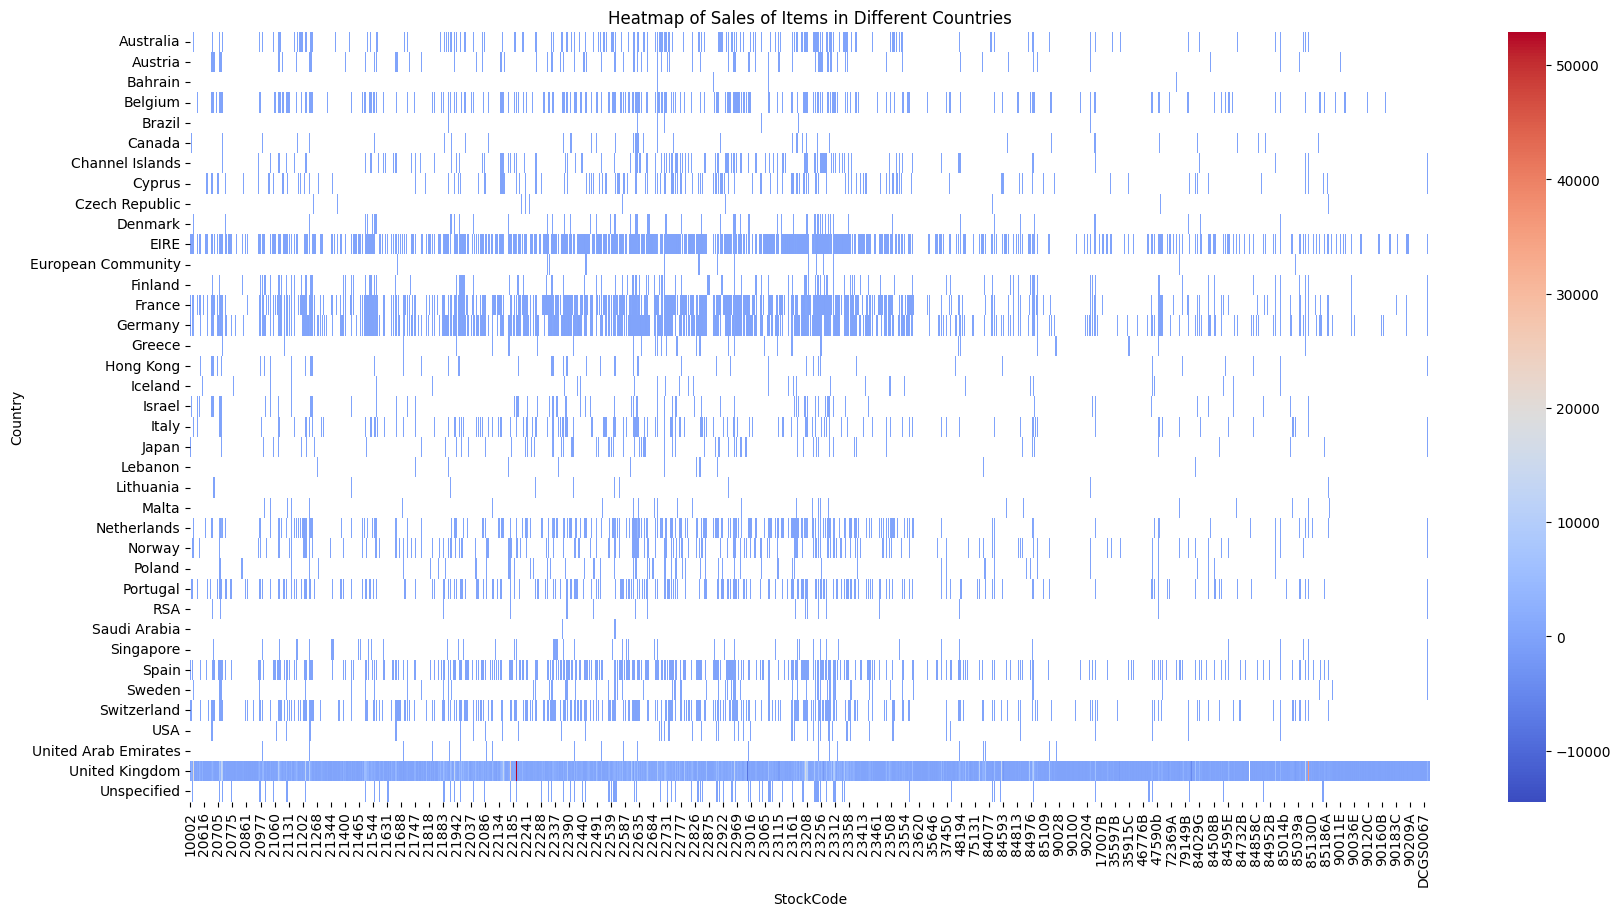

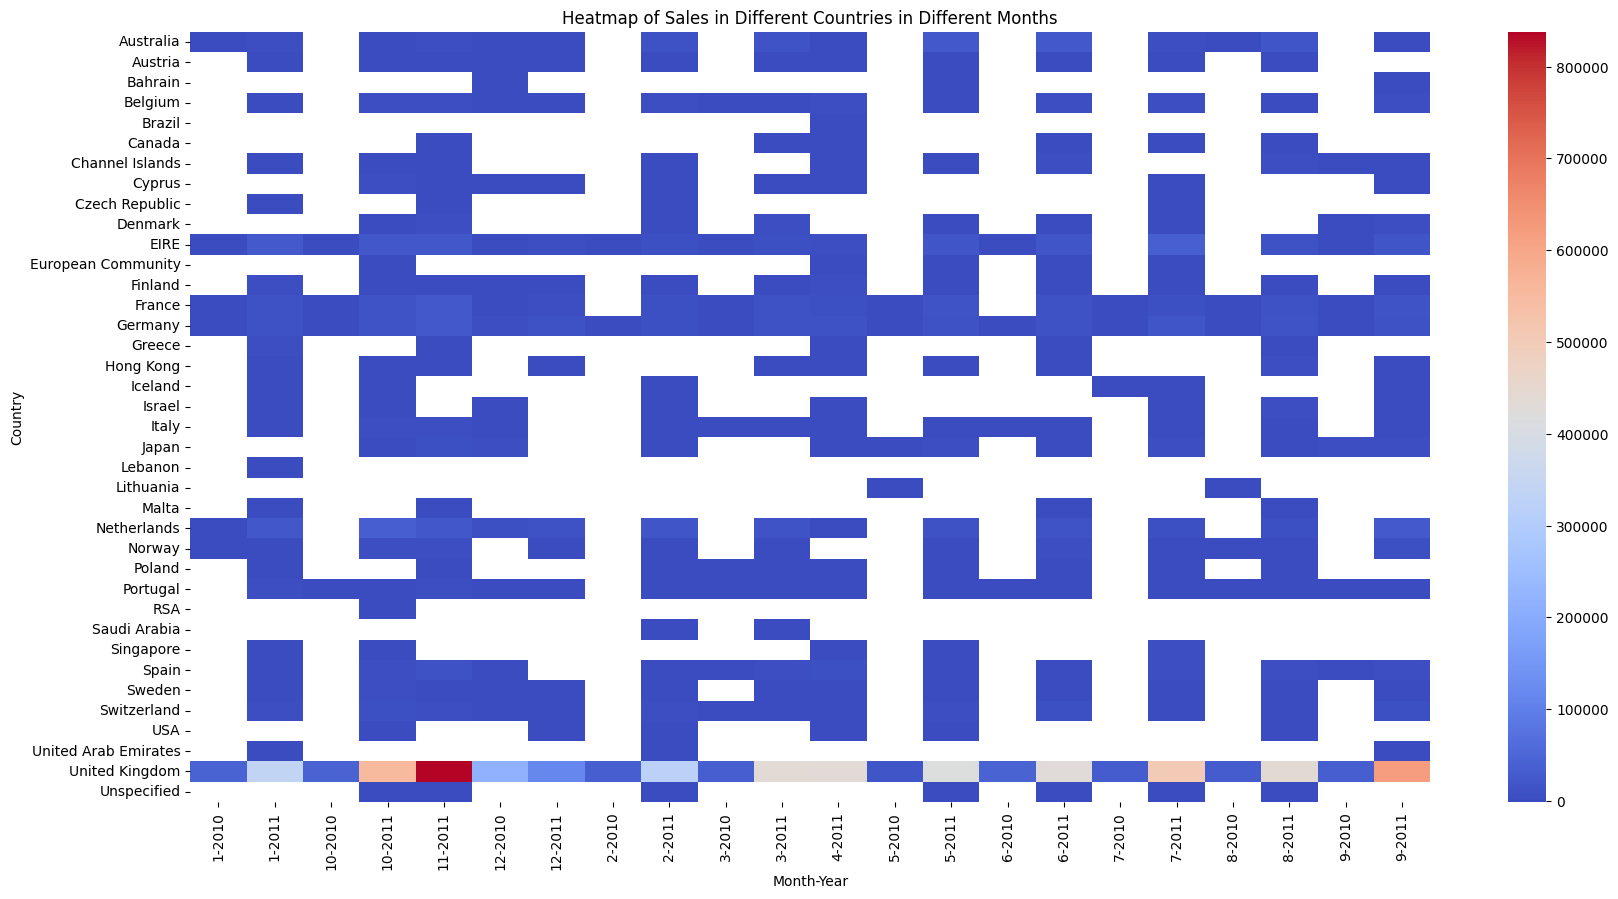

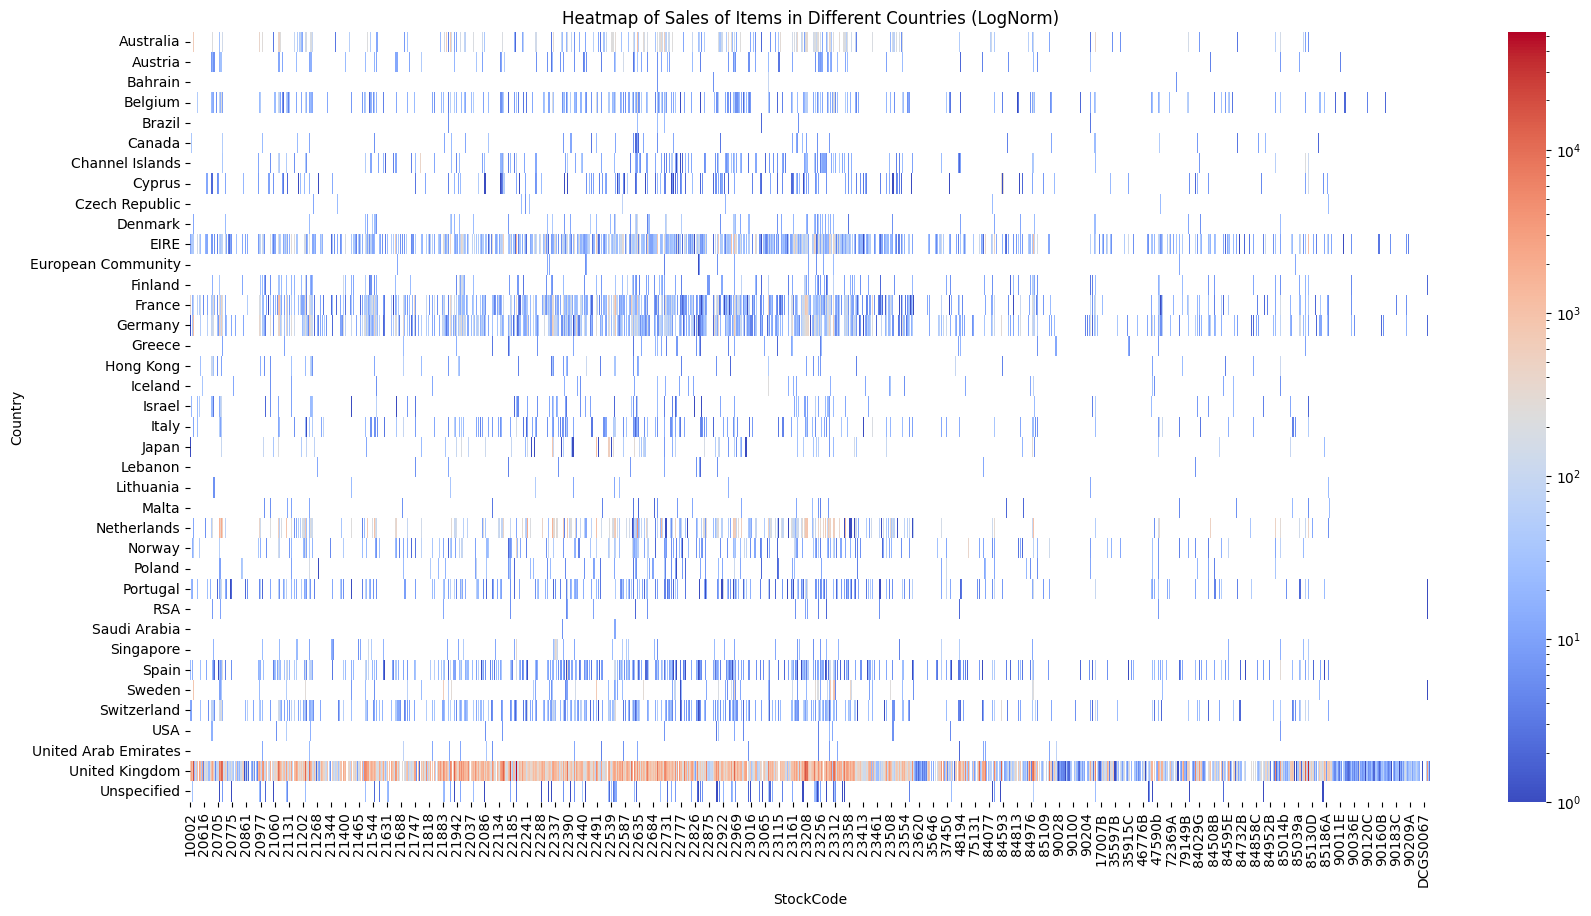

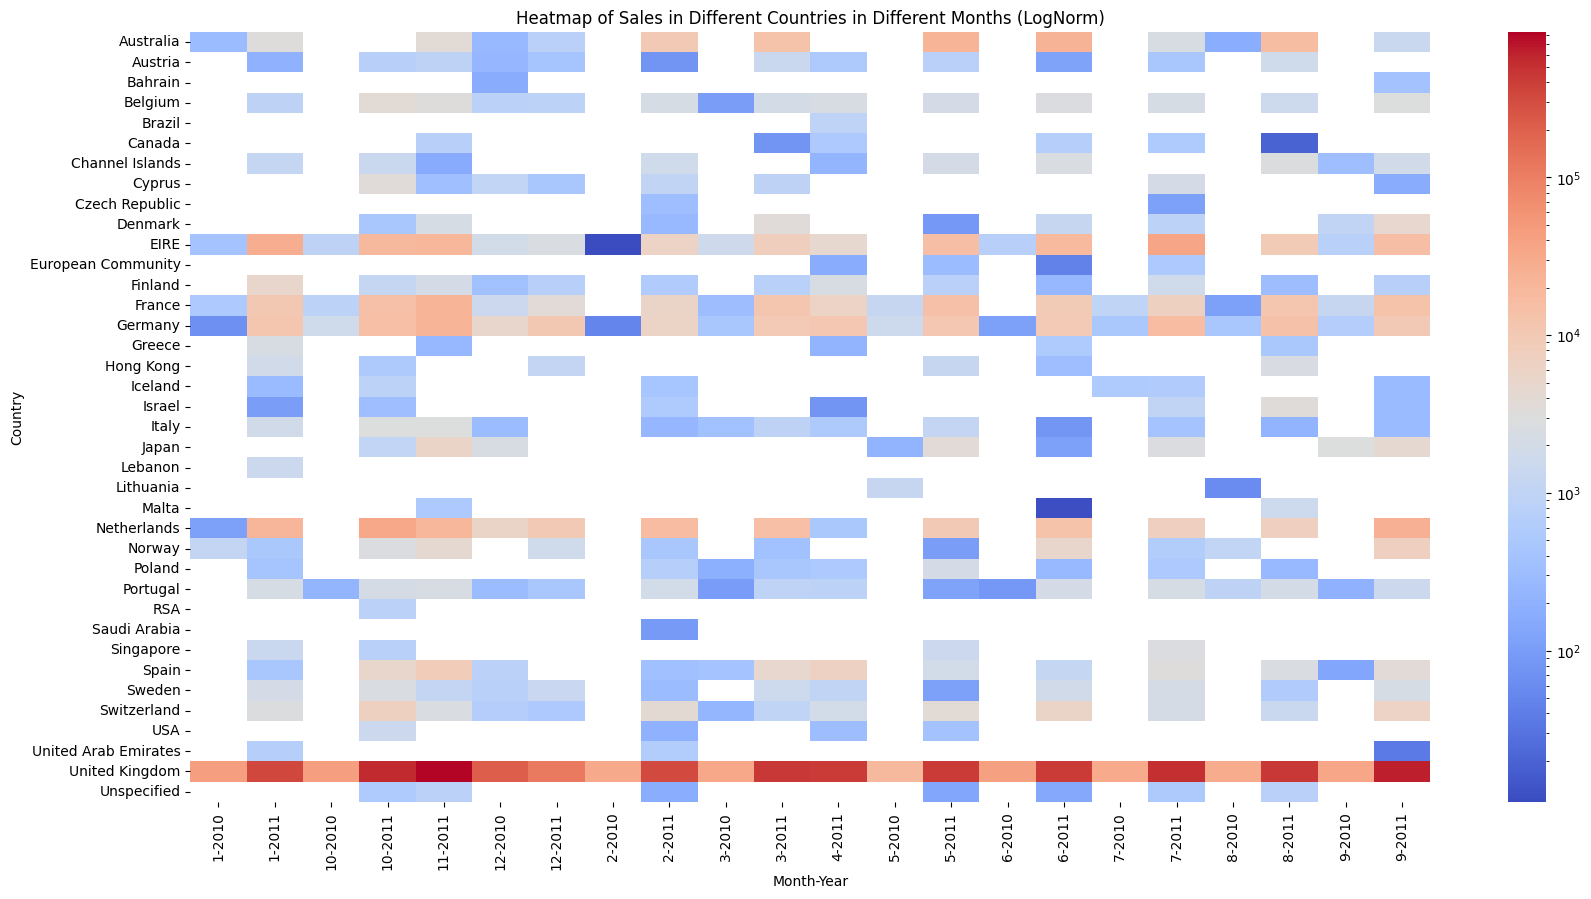

In [16]:
# describe the data and save it in a csv file
read_file.describe().to_csv('../out/Data Description.csv')


# pivot table of total sales in different months in different countries
pivot_table = read_file.pivot_table(index='Country', columns='Month-Year', values='Total Quantity Value', aggfunc='sum')
pivot_table.to_csv('../out/Pivot Table - total sales in different months in different countries.csv')


# heatmap of sales of Items in different countries
plt.figure(figsize=(20,10))
sns.heatmap(read_file.pivot_table(index='Country', columns='StockCode', values='Quantity', aggfunc='sum'), cmap='coolwarm')
plt.title('Heatmap of Sales of Items in Different Countries')
plt.savefig('../out/Heatmap of Sales of Items in Different Countries.png')


# heatmap of sales in different months in different countries
plt.figure(figsize=(20,10))
sns.heatmap(read_file.pivot_table(index='Country', columns='Month-Year', values='Total Quantity Value', aggfunc='sum'), cmap='coolwarm')
plt.title('Heatmap of Sales in Different Countries in Different Months')
plt.savefig('../out/Heatmap of Sales in Different Countries in Different Months.png')


# heatmap of sales of Items in different countries (exponential)
plt.figure(figsize=(20,10))
sns.heatmap(read_file.pivot_table(index='Country', columns='StockCode', values='Quantity', aggfunc='sum'), cmap='coolwarm', norm=LogNorm())
plt.title('Heatmap of Sales of Items in Different Countries (LogNorm)')
plt.savefig('../out/Heatmap of Sales of Items in Different Countries  (LogNorm).png')


# heatmap of sales in different months in different countries (exponential)
plt.figure(figsize=(20,10))
sns.heatmap(read_file.pivot_table(index='Country', columns='Month-Year', values='Total Quantity Value', aggfunc='sum'), cmap='coolwarm', norm=LogNorm())
plt.title('Heatmap of Sales in Different Countries in Different Months (LogNorm)')
plt.savefig('../out/Heatmap of Sales in Different Countries in Different Months (LogNorm).png')

